## Pre Requisites

In [56]:
import pandas as pd

df = pd.read_csv('fct_invoice.csv')
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
jsondf = pd.read_json("dim_customer.json")
jsondf

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


## Easy

In [57]:
#1 - How many unique customers are in the dataset?

unique = len(pd.unique(df["customer_id"])) #Gets the amount of unique customer IDs there are
print("There are " + str(unique) + " unique customers.") #Prints the amount of unique customers with accompanying text

There are 5191 unique customers.


In [58]:
#2 - What are the different categories of products available? How many unique categories are there?

category = pd.unique(df["category"]) #Gets all the categories without any repeats
catCount = str(len(category)) #Gets the amount of items in category and converts it to a string

print("The categories are " + str(category) + ". There are " + catCount + " categories.") #Prints results with accompanying text

The categories are ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']. There are 8 categories.


In [59]:
#3 - Which payment method is the most popular? How many times was it used?

most = df['payment_method'].value_counts().idxmax() #Gets what payment method apears the most
mostCount = max(df['payment_method'].value_counts()) #Gets the amount of times the most popular payment method is used

print(str(most) + " with " + str(mostCount) + " uses is the most popular payment method") #Prints results with accompanying text

Cash with 44447 uses is the most popular payment method


## Medium

In [61]:
#1 - What are the three most popular categories, by total sales?

df['totalSale'] = df['quantity'] * df['price'] #Gets value of the total sales by multiplying the quantity and price of items
top = pd.DataFrame(df.groupby('category')['totalSale'].sum().nlargest(3)) #Shows the top 3 categories based on totalSale

top #Outputs the results of "top"

,totalSale
category,
Clothing,1.139968e+08
Shoes,6.655345e+07
Technology,5.786235e+07


In [62]:
#2 - What are the total sales attributed to customers over the age of 45?

df['custSale'] = df['quantity'] * df['price'] #Gets the total sales value by multiplying the quantity times price
sales = pd.DataFrame(df.groupby('customer_id')['custSale'].sum()) #Adds all the data under "custSale" based on their customer id

jsondf['customer_id'] = jsondf['id'] #renames "id" so that the two data frames will have the same label
ages = jsondf[['age', 'customer_id']] #creates a set of data that only contains the age and customer ids from the json file

complete = pd.merge(sales, ages, on = 'customer_id') #Merges the data set with the sales and the age information into one
over = complete.loc[complete['age'] > 45] #Only gets the data of values where the corresponding age value is above 45

tol = over['custSale'].sum() #Adds all the value of all the sales together

print("The total sales attribute to customers over the age of 45 is " + str(tol) + ".") #Prints output with accompanying text

The total sales attribute to customers over the age of 45 is 82039768.14999998.


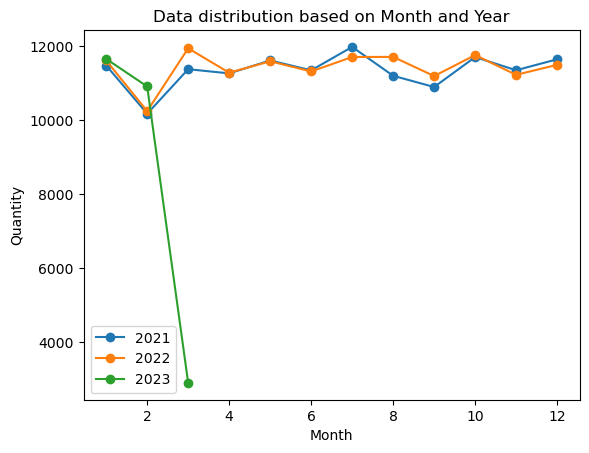

In [63]:
'''
3 - How is the data distributed across different invoice dates?
Are there any seasonal trends or patterns? (Use a graph for this.)
'''
import matplotlib.pyplot as plt #makes matplotlib usable for the code

df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = "%d/%m/%Y") #Formats the dates to be usable for commands
df['year'] = df['invoice_date'].dt.year #Makes a separate column for the year of each invoice
df['month'] = df['invoice_date'].dt.month #Makes a separate column for the month of each invoice

quants = pd.DataFrame(df.groupby(['month','year'])['quantity'].sum()) #Adds the value for quanitity of items sold based on the month and year it was sold

quants = quants.reset_index() #Resets the index to make each value separate

year1 = quants.loc[quants['year'] == 2021] #Separates all values tied to the year 2021
year2 = quants.loc[quants['year'] == 2022] #Separates all values tied to the year 2022
year3 = quants.loc[quants['year'] == 2023] #Separates all values tied to the year 2023

ax = year1.plot(x='month', y='quantity', label = '2021', marker = "o") #Creates a graph for data related to 2021
year2.plot(ax=ax, x='month', y='quantity', label = '2022', marker = "o") #Creates a graph for data related to 2022
year3.plot(ax=ax, x='month', y='quantity', label = '2023', marker = "o") #Creates a graph for data related to 2023

#Everything onward is just for labeling the graph
ax.set_xlabel('Month')
ax.set_ylabel('Quantity')
ax.set_title('Data distribution based on Month and Year')
ax.legend()
plt.show()

### Please explain what trend your graph is showing:

When it comes to 2021 and 2022, we can see a pretty consistent stream of the amount sold, each having similar rises and dips as the other. We see a major change in the trend when we get to 2023, we see a dip in sales as we get to the 3rd month and no more sales from that point onward. Seeing as how the trend was being followed for the first 2 months of 2023, we can assume the change in the trend is because the year hasn't been finished and that the data was prematurely used.

## Hard

In [64]:
'''
1 - Create a pivot table showing the breakdown of sales across these dimensions,
in this order: category, decade age range
'''

df['custSale'] = (df['quantity'] * df['price']) #Gets the value for total customer sales
reqs = df[['customer_id', 'category', 'custSale']] #Creates a new data frame that containes the information for customer id, category, and customer sales

jsondf['customer_id'] = jsondf['id'] #Assigns the value for "id" to a new label to have the same label as the other data frame
ages = jsondf[['age', 'customer_id']] #Creates a data frame that only has the age and customer id values

comp = pd.merge(reqs, ages, on = 'customer_id') #Merges the two data framed with the needed data based on customer id

combined = pd.DataFrame(comp.groupby(['category','age'])['custSale'].sum()) #Adds the customer sales based on category and age

combined = combined.reset_index() #Essentially ungroups the data connected to the same row

bins = [10, 20, 30, 40, 50, 60, 70, 80, 90] #Sets the intervals
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89'] #Sets the labels for the intervals
combined['ageRange'] = pd.cut(combined['age'], bins=bins, labels=labels, right=False) #Implements the intervals based on the age value

pivot = pd.DataFrame(combined.groupby(['category', 'ageRange'])['custSale'].sum()) #Adds the value of customer sales based on the category and age range

pivot #outputs the code of "pivot"

custSale
category ageRange           
Books    10-19      12801.75
         20-29      79461.75
         30-39      84143.10
         40-49      87203.40
         50-59      74962.20
...                      ...
Toys     40-49     390906.88
         50-59     345067.52
         60-69     363955.20
         70-79     273244.16
         80-89     153932.80

[64 rows x 1 columns]